# Ejercicio 4: Algoritmos ML


Las líneas 400 y 500, realizan un proceso de corte de un papel filtrante por ultrasonidos para su posterior incorporación a las líneas 4 y 5 donde se suelda para terminar de ensamblar los filtros.

1.	LOCATION_ID: Identificador único para la localización dentro de las distintas plantas de producción.
2.	Line: Línea de producción (para un mismo producto puede disponerse de varias líneas para aumentar el volumen de producción).
3.	Station: Estación física de trabajo diseñada para realizar uno o varios procesos productivos (una estación puede contar con varios puestos de trabajo). La etiqueta indica un tipo de estación no una unidad física.
4.	Index: Indica el número de estaciones del mismo tipo que hay dentro de la línea. Ej. Línea: 400, Station:20, Index:1,2 (si hay dos estaciones de tipo 20 dentro de la línea 400).
5.	Fu: Function Unit. Separaciones funcionales dentro de la estación e index. Cuando dentro de una estación se realizan dos funciones distintas.
6.	WP: Work Position. Posición donde se pueden realizar uno o más procesos, dentro de una function unit (ej. envasar y estampar).
7.	TP: Tool Position. Posición de la herramienta dentro del WP. Varia cuando tienes varias herramientas involucradas en la misma WP.
8.	RESULT_DATE: Fecha, hora y franja horaria.
9.	UNIQUEPART_ID: **Identificador único** de cada una de las piezas producidas.
10.	Cut Amplitude: Amplitud del corte realizado (micrómetros).
11.	Cut Energy: Energía utilizada en el corte (J).
12.	Cut Frecuency: Frecuencia ultrasonido utilizada para realizar el corte (Hz).
13.	Cut Power: Potencia de corte (W).
14.	Cut WeldTime: Tiempo necesario para realizar el corte del papel (ms).
15.	Grammage: Gramaje del papel de lija (g/m2).
16.	Humidity: Humedad del entorno (%).
17.	Temperature: Grados del entorno.
















Importar librerias con las que trabajaremos

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm

Cargar fichero con los datos a utilizar

In [2]:
# Load dataset
df = pd.read_csv("CleanedData.csv",delimiter=';')

Analisis de los datos

In [3]:
# See first 5 rows of dataset
df.head()

,LOCATION_ID,Line,Station,Index,Fu,WP,TP,RESULT_DATE,UNIQUEPART_ID,Cut Amplitude,Cut Energy,Cut Frequency,Cut Power,Cut WeldTime,Grammage,Humidity,Temperature
0,00000000040000200001400210001,400,20,1,4,21,1,"27/01/23 07:01:30,925766000 EUROPE/BERLIN",L4_2004533475_FU4_230127_070131,122.0,320.0,20081.0,3522.0,383.0,0.0,35.56017,23.40465
1,00000000040000200001400210001,400,20,1,4,21,1,"27/01/23 07:01:35,066370000 EUROPE/BERLIN",L4_2004533475_FU4_230127_070135,102.0,320.0,20078.0,2730.0,283.0,0.0,35.52355,23.44279
2,00000000040000200001400210001,400,20,1,4,21,1,"27/01/23 07:01:41,316380000 EUROPE/BERLIN",L4_2004533475_FU4_230127_070141,123.0,320.0,20106.0,3315.0,274.0,0.0,35.52660,23.41533
3,00000000040000200001400210001,400,20,1,4,21,1,"27/01/23 07:01:47,582042000 EUROPE/BERLIN",L4_2004533475_FU4_230127_070147,107.0,320.0,20080.0,2844.0,280.0,0.0,35.48082,23.39702
4,00000000040000200001400210001,400,20,1,4,21,1,"27/01/23 07:01:53,865001000 EUROPE/BERLIN",L4_2004533475_FU4_230127_070154,101.0,320.0,20078.0,2763.0,285.0,0.0,35.46556,23.41228


In [4]:
# See basic stats for numerical columns
df.describe()

,Line,Station,Index,Fu,WP,TP,Cut Amplitude,Cut Energy,Cut Frequency,Cut Power,Cut WeldTime,Grammage,Humidity,Temperature
count,16076.000000,16076.0,16076.0,16076.000000,16076.0,16076.0,16076.000000,16076.000000,16076.000000,16076.000000,16076.000000,16076.000000,16076.000000,16076.000000
mean,475.161732,20.0,1.0,3.170814,21.0,1.0,111.260761,332.841192,20032.532657,2506.980592,329.596479,407.585581,35.040988,22.461128
std,43.208835,0.0,0.0,0.985334,0.0,0.0,9.251505,22.414825,43.351907,1051.830733,49.945660,210.529409,1.338493,0.288926
min,400.000000,20.0,1.0,2.000000,21.0,1.0,81.000000,280.000000,19972.000000,13.000000,201.000000,0.000000,30.030210,21.810050
25%,500.000000,20.0,1.0,2.000000,21.0,1.0,104.000000,320.000000,20000.000000,1698.000000,286.000000,491.710400,34.290600,22.263250
50%,500.000000,20.0,1.0,4.000000,21.0,1.0,111.000000,330.000000,20020.000000,2634.000000,345.000000,510.643400,34.708700,22.446360
75%,500.000000,20.0,1.0,4.000000,21.0,1.0,119.000000,350.000000,20058.000000,3358.000000,364.000000,520.948300,35.352640,22.609640
max,500.000000,20.0,1.0,4.000000,21.0,1.0,131.000000,390.000000,20190.000000,4466.000000,499.000000,666.406500,40.534680,23.500780


In [5]:
# Plot correlation between numerical columns
numCols = ['Cut Amplitude', 'Cut Energy','Cut Frequency','Cut Power','Cut WeldTime','Grammage','Humidity','Temperature']
df[numCols].corr()

,Cut Amplitude,Cut Energy,Cut Frequency,Cut Power,Cut WeldTime,Grammage,Humidity,Temperature
Cut Amplitude,1.000000,-0.088484,0.411653,0.899703,0.158348,-0.139214,0.119788,0.133060
Cut Energy,-0.088484,1.000000,-0.051025,-0.216703,0.708144,0.355684,-0.125524,0.101788
Cut Frequency,0.411653,-0.051025,1.000000,0.412032,0.104043,-0.539887,0.476386,0.347690
Cut Power,0.899703,-0.216703,0.412032,1.000000,0.076624,-0.043887,0.062471,0.089603
Cut WeldTime,0.158348,0.708144,0.104043,0.076624,1.000000,0.063371,0.046564,0.114621
Grammage,-0.139214,0.355684,-0.539887,-0.043887,0.063371,1.000000,-0.622789,-0.225381
Humidity,0.119788,-0.125524,0.476386,0.062471,0.046564,-0.622789,1.000000,0.013942
Temperature,0.133060,0.101788,0.347690,0.089603,0.114621,-0.225381,0.013942,1.000000


<AxesSubplot:xlabel='Cut Amplitude', ylabel='Cut Power'>

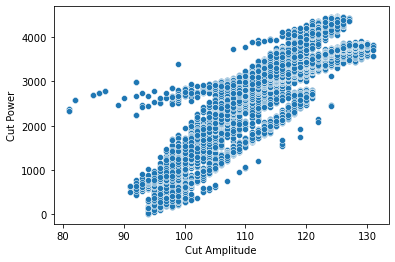

In [6]:
sns.scatterplot(data=df, x='Cut Amplitude', y='Cut Power')

### CLASIFICACION

In [7]:
numCols = ['Cut Amplitude', 'Cut Energy','Cut Frequency','Cut Power','Cut WeldTime','Grammage','Humidity','Temperature']
x = df[numCols]
y=df['Line']

In [8]:
scaler = preprocessing.MinMaxScaler().fit(x)
X_scaled = scaler.transform(x)
X_scaled

array([[0.82      , 0.36363636, 0.5       , ..., 0.        , 0.52643874,
        0.9431429 ],
       [0.42      , 0.36363636, 0.48623853, ..., 0.        , 0.52295261,
        0.96570121],
       [0.84      , 0.36363636, 0.6146789 , ..., 0.        , 0.52324296,
        0.9494597 ],
       ...,
       [0.74      , 0.45454545, 0.30733945, ..., 0.79060303, 0.32510255,
        0.44945674],
       [0.84      , 0.45454545, 0.39908257, ..., 0.7905115 , 0.32800798,
        0.45938737],
       [0.64      , 0.45454545, 0.27981651, ..., 0.78712603, 0.33149412,
        0.44945674]])

In [9]:
y

0        400
1        400
2        400
3        400
4        400
        ... 
16071    500
16072    500
16073    500
16074    500
16075    500
Name: Line, Length: 16076, dtype: int64

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=7,shuffle=True)

In [11]:
clf = svm.SVC()
clf.fit(x_train, y_train)

SVC()

In [12]:
y_pred = clf.predict(x_test)
y_pred 

array([500, 500, 500, ..., 500, 500, 500], dtype=int64)

In [13]:
y_test

10904    500
8231     500
7002     500
9017     500
11399    500
        ... 
5135     500
10692    500
10230    500
10876    500
5890     500
Name: Line, Length: 4019, dtype: int64

<AxesSubplot:>

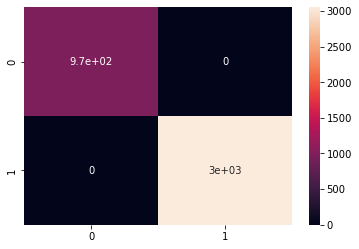

In [14]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred, normalize=True)

1.0

In [16]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred,pos_label=400)

1.0

### REGRESION

<AxesSubplot:ylabel='Grammage'>

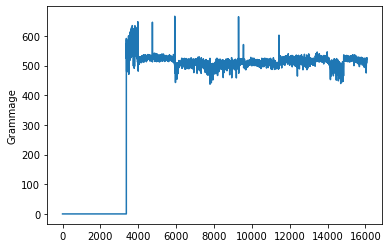

In [17]:
sns.lineplot(data=df['Grammage'])

<AxesSubplot:ylabel='Grammage'>

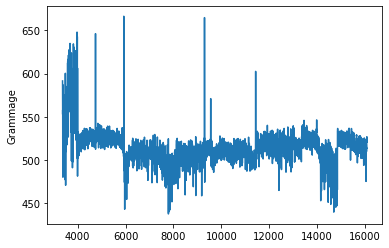

In [18]:
dfGrammage = df.loc[df['Grammage'] != 0]
sns.lineplot(data=dfGrammage['Grammage'])

In [19]:
c = ['Line','Cut Amplitude', 'Cut Energy','Cut Frequency','Cut Power','Cut WeldTime','Humidity','Temperature','Grammage']
dfClean = dfGrammage[c]
scaler = preprocessing.MinMaxScaler().fit(dfClean)
df_scaled = scaler.transform(dfClean)
df_scaled

array([[0.        , 0.39583333, 1.        , ..., 0.54938519, 0.97635619,
        0.67274899],
       [0.        , 0.54166667, 1.        , ..., 0.55190915, 0.97930683,
        0.58151285],
       [0.        , 0.8125    , 1.        , ..., 0.55159378, 1.        ,
        0.50386276],
       ...,
       [1.        , 0.77083333, 0.45454545, ..., 0.34806004, 0.39901344,
        0.39038365],
       [1.        , 0.875     , 0.45454545, ..., 0.35121576, 0.40985395,
        0.39011716],
       [1.        , 0.66666667, 0.45454545, ..., 0.35500221, 0.39901344,
        0.38026105]])

In [20]:
#numCols = ['Line','Cut Amplitude', 'Cut Energy','Cut Frequency','Cut Power','Cut WeldTime','Humidity','Temperature']
x = df_scaled[:, :-1]
y = df_scaled[:, -1]

In [21]:
y

array([0.67274899, 0.58151285, 0.50386276, ..., 0.39038365, 0.39011716,
       0.38026105])

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=7)

In [23]:
regr = svm.SVR()
regr.fit(x_train, y_train)

SVR()

In [24]:
y_pred = regr.predict(x_test)
y_pred 

array([0.36387736, 0.38462586, 0.34633295, ..., 0.35512577, 0.36004404,
       0.37054316])

In [25]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5369666771141686

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.04107761675909497

In [27]:
mean_squared_error(y_test, y_pred)

0.0026843818850970855

In [28]:
my_pd=pd.DataFrame(data=[y_test,y_pred]).T
my_pd.columns=['y','y_pred']
my_pd = my_pd.sort_values(by=['y_pred'])
my_pd= my_pd.reset_index(drop=True)
my_pd

,y,y_pred
0,0.258524,0.163016
1,0.201518,0.163704
2,0.232419,0.164224
3,0.259856,0.164898
4,0.258524,0.165062
...,...,...
3172,0.862547,0.679351
3173,0.753197,0.745439
3174,0.633325,0.747129
3175,0.713106,0.772472


<AxesSubplot:ylabel='y_pred'>

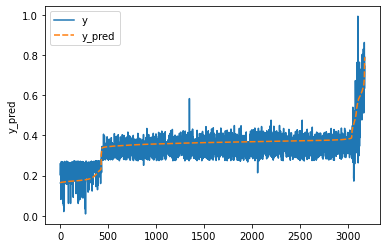

In [29]:
sns.lineplot(data=my_pd['y_pred'])
sns.lineplot(data=my_pd)


# Contenido mínimo : 


1. Utiliza uno o dos metodos de seleccion de variables para evaluarlas y descartar alguna variable en caso de considerarse conveniente.  
1. Utiliza otro metodo de clasificación para identificar a que linea pertenecen los datos.
2. Utiliza otro metodo de regresión para predecir el gramage del papel filtrante.
1. Añade y explica 2 metricas para evaluar el resultado de los modelos generados (2 para el clasificador y 2 para el regresor).

# Ultimos 2 puntos: 


1.   Utiliza un algoritmo complejo (ej. Random Forest, NN...) y realiza un proceso de ajuste de los parametros para un problema de regresión por el cual queremos estimar el valor de la frecuencia de corte. Justifica al ajuste de parametros realizado.







